# Introduction

Optyx provides tensor network evaluation for hybrid circuits over photonic and qubit modes.

The package is structured into three modules giving different *generators* for the nodes in the network.
- ZX diagrams: generated by the phased Z and X spiders and the hadamard box.
- ZW diagrams: generated by the split map W and its dagger, as well as Z spiders on the Fock space.
- LO circuits: generated by beam splitters, phase shifts, and other gates.

The `optyx.Diagram` class can store any (well-typed) composition of the above generators together with the `DualRail` encoding.

The `channel.Circuit` class provides the simulation of any composition as a completely positive maps. 
It gives further generators `Encode`, `Measure`, `Discard` and `CPhase`, allowing to simulate arbitrary circuits with measurements and classical control.

### Build a linear optical circuit

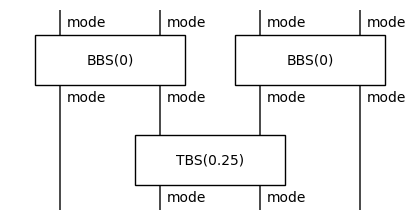

In [3]:
from optyx import lo

circuit = lo.BS @ lo.BS >> lo.Id(1) @ lo.TBS(0.25) @ lo.Id(1)
circuit.foliation().draw()

### Evaluate an amplitude of the circuit

In [5]:
from optyx import zw

state = zw.Create(1, 0, 0, 1)
effect = zw.Select(0, 1, 0, 1)

(state >> circuit >> effect).to_zw().to_tensor().eval()

Tensor[complex128]([0.+0.35355339j], dom=Dim(1), cod=Dim(1))

### Evaluate a marginal output distribution

In [7]:
from optyx.channel import Channel, Measure, Discard, qmode

distribution = Channel('new_state', state >> circuit) >> Discard(qmode ** 2) @ Measure(qmode) @ Discard(qmode)
distribution.double().to_zw().to_tensor(max_dim=3).eval()

Tensor[complex128]([0.625+0.j, 0.25 +0.j, 0.125+0.j], dom=Dim(1), cod=Dim(3))

### Build an entangled state in ZX

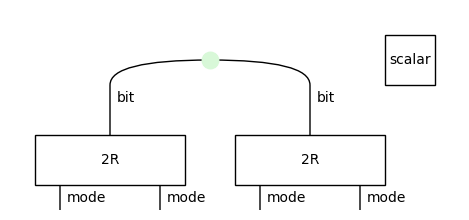

In [16]:
from optyx import zx, optyx
import numpy as np

qubit_state = zx.Z(0, 2) @ zx.Scalar(1/np.sqrt(2))

dual_rail_state = qubit_state >> optyx.dual_rail(2)
dual_rail_state.foliation().draw()

### Evaluate a hybrid channel with qubits and qmodes.

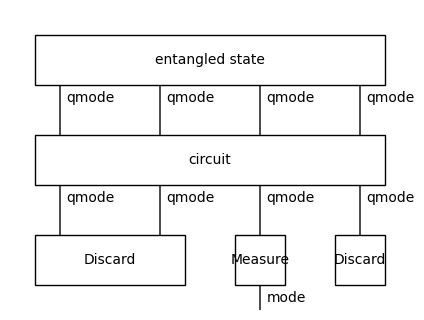

array([1.+0.j, 0.+0.j, 0.+0.j])

In [18]:
from optyx.channel import qubit

q_state = Channel('entangled state', dual_rail_state)
q_circuit = Channel('circuit', circuit)

marginal = q_state >> q_circuit >> Discard(qmode ** 2) @ Measure(qmode) @ Discard(qmode)
marginal.foliation().draw()
marginal.double().to_zw().to_tensor(max_dim=3).eval().array.round()